In [71]:
import numpy as np
import pandas as pd
import regex as re

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme()
sns.set_style('whitegrid')
sns.set_palette(['#FF5F5D', '#3F7C85', '#00CCBF', '#72F2EB', '#747E7E'])

import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')


In [72]:
df=pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA

In [73]:
df.shape

(891, 12)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [75]:
# values with counts for any column
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [76]:
print(df['Embarked'].unique())
print(df['Embarked'].nunique())

['S' 'C' 'Q' nan]
3


In [77]:
for features in df.columns:
    print(features)
    print(df[features].value_counts())
    print('---------------')

PassengerId
PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64
---------------
Survived
Survived
0    549
1    342
Name: count, dtype: int64
---------------
Pclass
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
---------------
Name
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
---------------
Sex
Sex
male      577
female    314
Name: count, dtype: int64
---------------
Age
Age
24.0

In [78]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [79]:
df.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


<Axes: >

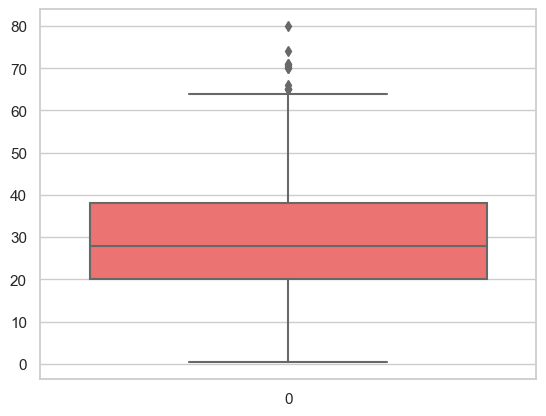

In [80]:
sns.boxplot(df['Age'])

<Axes: >

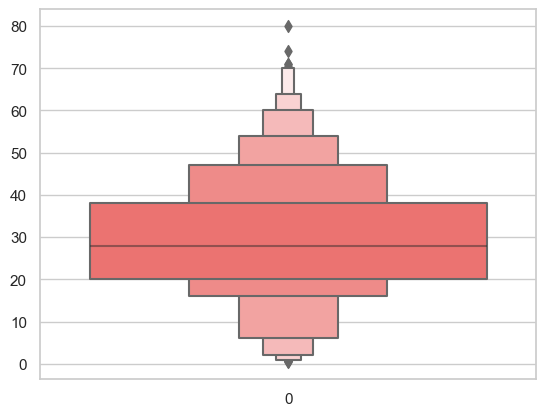

In [81]:
sns.boxenplot(df['Age'])

In [82]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'

- Insignificant Features?
- Cateogrical Features?
- Ordinal Features?
- Continuous Features?
- Discrete Features?
----------------------------------------------------------------
- **Insignificant:** Passenger ID, Name, Ticket, Cabin
- **Cateogrical:** Survived, Sex, Embarked
- **Ordinal:** Pclass
- **Continuous:** Age, Fare
- **Discrete:** SibSp, Parch

### Relationship of survived with Sex, Pclass, SibSp, Parch?

**Assumptions/ Questions**
- Women, children and upper-class passengers were more likely to have survived.
- Did people traveling in groups have more chances of survival?

In [83]:
print(df[['Sex','Survived']].groupby(['Sex'],as_index=False).sum())
print("-------------------")
print(df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean())

      Sex  Survived
0  female       233
1    male       109
-------------------
      Sex  Survived
0  female  0.742038
1    male  0.188908


### EDA through visualization

<Axes: xlabel='Survived', ylabel='count'>

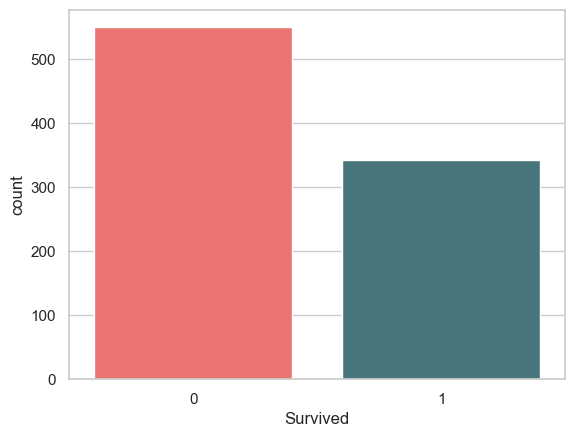

In [84]:
# A count plot is used for categorical data to show the frequency of each category.
sns.countplot(data=df,x='Survived')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

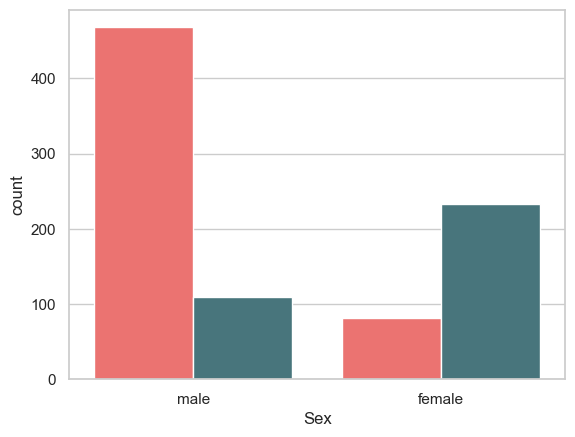

In [85]:
# using hue for sub-feature histograms --> data dependency distribution
sns.countplot(data=df,x='Sex',hue='Survived')

<Axes: xlabel='Embarked', ylabel='count'>

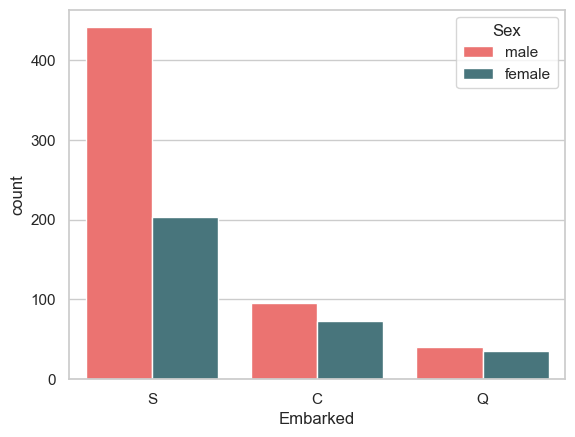

In [ ]:
# using hue for sub-feature histograms --> data dependency distribution
sns.countplot(data=df,x='Embarked',hue='Sex')

In [ ]:
# how about 4 features?
facet_data = df[['Sex', 'Survived', 'Embarked', 'Pclass', 'Fare']].groupby(['Sex', 'Survived', 'Embarked', 'Pclass']).agg('sum').reset_index()
px.bar(facet_data, x='Sex', y='Fare', facet_row='Survived', facet_col='Pclass', color='Embarked', barmode='group')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

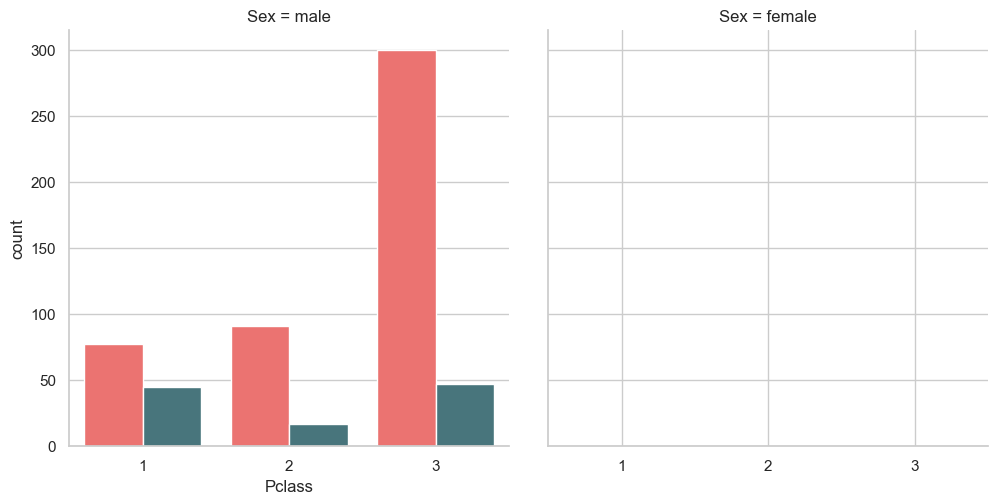

In [ ]:
# adding a third feature into the analysis
sns.catplot(data=df, x='Pclass', col='Sex', hue="Survived", kind='count')
